<a href="https://colab.research.google.com/github/adnaanahmed253/Business-Case-Netflix---Data-Exploration-and-Visualisation/blob/main/Netflix_Business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # ***Business Case: Netflix - Data Exploration and Visualisation***

#**1.** Problem Staement and anlysing the dataset.



## Problem Statement:
Analyzing the data and generate insights that could help Netflix in deciding which type of
shows/movies to produce and how they can grow the business in different countries.

## Analysing basic metrics about Data:
This tabular dataset consists of data as of mid-2021, about 8807 movies and tv shows available on
Netflix, along with details such as - cast, directors, ratings, release year, duration, etc. The data is
available in a single csv file

***Features of the dataset:

```
# This is formatted as code
```

***

Feature Description

Show ID - The ID of the show

Type Identifier - A Movie or TV Show

Title - Title of the Movie / Tv Show

Director - Director of the Movie

Cast - Actors involved in the movie/show

Country - Country where the movie/show was produced

Date_added - Date it was added on Netflix

Release_year - Actual Release year of the movie/show

Rating - TV Rating of the movie/show

Duration - Total Duration - in minutes or number of seasons

Listed_in - Genre

Description - The summary description




In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import copy

 All the required libraries have been imposrted to perform the analysis on the Netflix dataset.

#**2.** Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary




In [ ]:
df = pd.read_csv('netflix.csv')

Reading the datased in df

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.shape

(8807, 12)

***Insight:***
From the above analysis, it is clear that in the given data total 12 features are present
and 8807 records are present, in 12 features 11 features are object data type and 1 feature is integer
data type.

By using the head() function we can see the top 5 rows of the dataset

Using the info() function we can get a brief insight into the columns of the dataset, datatyoe of each column and number of not null values per column.

shape of the dataset can give us the number of rows and columns in the dataset.

Checking Null values

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Calculating Null value counts

In [ ]:
for i in df.columns:
  null_rate = df[i].isnull().sum()/ df.shape[0] * 100
  if null_rate >0:
    print(f"{i}' nulls rate :{round(null_rate,2)}%")

director' nulls rate :29.91%
cast' nulls rate :9.37%
country' nulls rate :9.44%
date_added' nulls rate :0.11%
rating' nulls rate :0.05%
duration' nulls rate :0.03%


In [ ]:
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


***Insights based on statistical summary :***
1. Type of content - Among the 8807 items available on Netflix, 6131 of them are
movies, accounting for nearly 70% of the total content. The remaining 30% consists of TV series.
2. Director - Rajiv Chilaka holds the top position on the director list, with 19 credits to his
name. He specializes in creating animated movies for children.
3. Cast - David **Attenborough** leads the actor list with 19 appearances in various films and shows
on Netflix.
4. Country - The USA ranks at the top as the country with the highest production contribution
to Netflix, accounting for 35% of the total content.
5. Date Added - January 1, 2020, stands out as the peak date for content uploads on Netflix.
On that day alone, approximately 109 different shows and movies were added to the platform.
6. Ratings - There are 17 different types of ratings present on Netflix. The "TV-MA" (Mature Audience Only) rating dominates the charts, covering almost 36% of the total shows and movies on
the platform with this rating.
7. Listed_in - Dramas and International Movies are more in Netflix.

Duplicate Record Detection

In [ ]:
df.duplicated().value_counts()


False    8807
Name: count, dtype: int64

No Duplicate records found in the Dataset.

##**3.** Non-Graphical Analysis: Value counts and unique attributes


Unique values

In [ ]:
for i in df.columns:
  print(i,":",df[i].nunique())
#print("-"*20)


show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


***Insight:***
1. ShowId is unique hence it has 8807 unique Id’s are present.
2. Netflix two types content movies and TVshows hence type has 2 unique values
6
3. Every title is unique hence 8807 titles are present
4. 4528 unique directors are present, including movies and TVshows directors
5. Netflix has running streeming in 748 countires


In [ ]:
columns=['type', 'director', 'country', 'date_added',
'release_year', 'rating', 'duration', 'listed_in']
for i in columns:
  print(i,":")
  print(df[i].value_counts().head(5))
  print('-'*20)

type :
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
--------------------
director :
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Name: count, dtype: int64
--------------------
country :
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: count, dtype: int64
--------------------
date_added :
date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
Name: count, dtype: int64
--------------------
release_year :
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
Name: count, dtype: int64
--------------------
rating :
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64
--------------------
duration :
duration
1 Season     1793
2 Seasons 

above result is showing top 5 catagories in all features


## **4.** Visual Analysis - Univariate, Bivariate after pre-processing of the data

```
# This is formatted as code
```



***Categorization of Variables***

Based on the features described for your dataset, we can categorize the variables into continuous and categorical types for analysis, and then suggest appropriate visualizations for each type.

**Continuous Variables:**

Release_year (Actual year of release)

Duration (Total duration in minutes or number of seasons)

**Categorical Variables:**

Show ID (ID of the show)

Type (Movie or TV Show)

Title (Title of the Movie/TV Show)

Director (Director of the Movie)

Cast (Actors involved)

Country (Country where produced)

Date_added (Date added on Netflix)

Rating (TV rating)

Listed_in (Genre)

Description (Summary description)

***4.1***
 **For continuous variable(s): Distplot, countplot, histogram for univariate analysis**

Release_year: Visualize the distribution of release years.

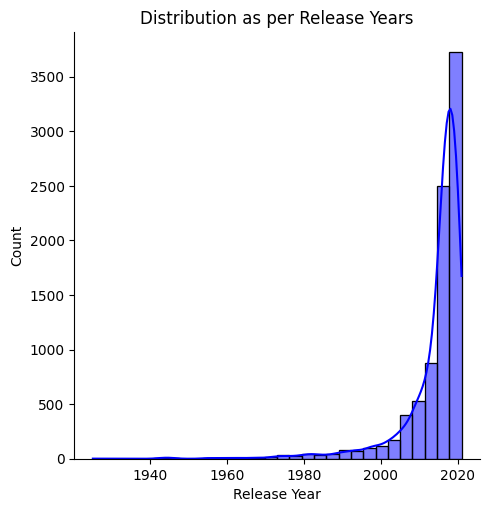

In [ ]:
# Distplot for 'Release_year'
ax = sns.displot(df['release_year'], bins=30, kde=True, color='blue')

ax.set(xlabel='Release Year',
       ylabel='Count',
       title='Distribution as per Release Years')


Histogram showing the distribution of release years.

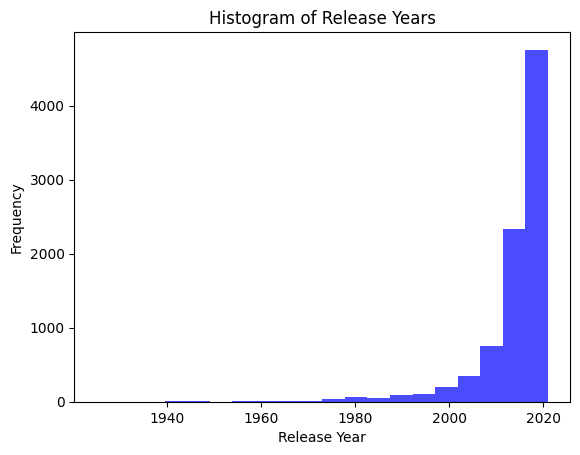

In [ ]:
plt.hist(df['release_year'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

***4.2***
 **Boxplot illustrating the distribution of duration for *TV* shows.**


<ipython-input-16-7d14f92cc3af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='duration', data=df2, palette='Set3')


<Axes: xlabel='type', ylabel='duration'>

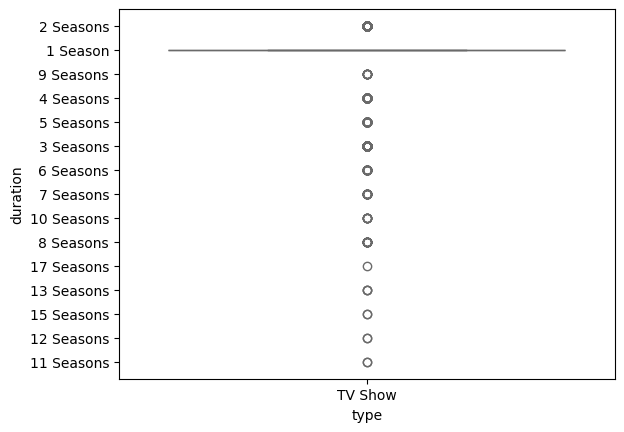

In [ ]:
df2 = df[df['type']=='TV Show']
sns.boxplot(x='type', y='duration', data=df2, palette='Set3')


Most of the attributes are categorical, hence heatmap wouldnot be a good choice for this kind of data


***4.3***
 **For correlation: Heatmaps, Pairplots**

 Most of the attributes are categorical, hence heatmap wouldnot be a good choice for this kind of data.


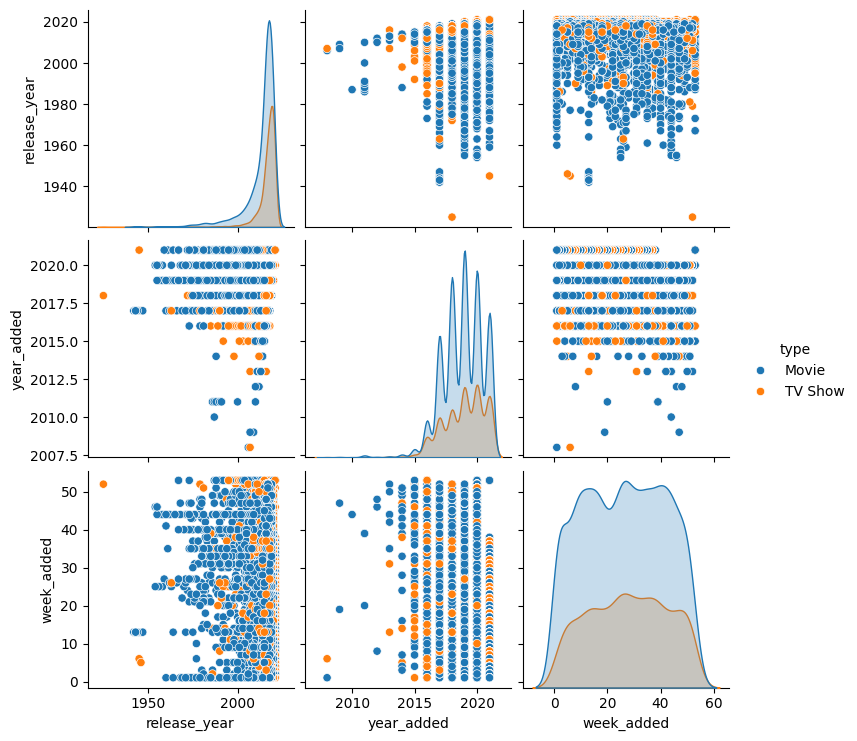

In [ ]:
sns.pairplot(data=df, hue='type')


##**5.** Missing Value & Outlier check

 Filling Missing values

1. Director Column - Filling it with Unknown Director
2. Cast Column - Filling it with Unknown Cast
3. Country Column - Filling it with Unknown Country
4. Date Added Column - Since it had only 10 missing values, details about it were found
from Google. Following details were obtained - - A Young Doctor’s Notebook and Other Stories -
September 15, 2014 - Anthony Bourdain: Parts Unknown - June 1, 2020 - Frasier - April 1, 2015
: Friends - January 1, 2015 - Gunslinger Girl - January 4, 2016 - Kikoriki - July 6, 2017 - La
Familia P. Luche - June 1, 2015 - Maron - November 2, 2018 - Red vs. Blue - March 21, 2015 - The
Adventures of Figaro Pho - January 1, 2016
5. Rating Column - Since it had only 7 missing values, details about it were found from Google.
Following details were obtained - - 13TH: A Conversation with Oprah Winfrey & Ava … - TV-PG
- Gargantia on the Verdurous Planet - TV-PG - Little Lunch - TV-Y - My Honor Was Loyalty -
PG-13 - Louis C.K. 2017 - TV-MA - Louis C.K.: Hilarious - TV-MA - Louis C.K.: Live at the
Comedy Store - TV-MA
6. Duration Column - Since it had only 3 missing values, details about it were found from
8
Google. Following details were obtained - - Louis C.K. 2017 - 74 min - Louis C.K.: Hilarious - 83
min - Louis C.K.: Live at the Comedy Store - 65 min


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df['director'].fillna('Unknown Director',inplace = True)
df['cast'].fillna('Unknown cast',inplace = True)
df['country'].fillna('Unknown country',inplace = True)

date = {"A Young Doctor's Notebook and Other Stories" : 'September 15, 2014',
"Anthony Bourdain: Parts Unknown" : 'June 1, 2020',
"Frasier" : 'April 1, 2015',
"Friends" : 'January 1, 2015',
"Gunslinger Girl" : 'January 4, 2016',
"Kikoriki" : 'July 6, 2017',
"La Familia P. Luche" : 'June 1, 2015',
"Maron" : 'November 2, 2018',
"Red vs. Blue" : 'March 21, 2015',
"The Adventures of Figaro Pho": 'January 1, 2016'}

for i in date :
  df.loc[df['title'] == i, 'date_added'] = date[i]


ratings = {"13TH: A Conversation with Oprah Winfrey & Ava DuVernay" : 'TV-PG',
"Gargantia on the Verdurous Planet" : 'TV-PG',
"Little Lunch" : 'TV-Y',
"My Honor Was Loyalty" : 'PG-13',
"Louis C.K. 2017" : 'TV-MA',
"Louis C.K.: Hilarious" : 'TV-MA',
"Louis C.K.: Live at the Comedy Store":'TV-MA'}


for i in ratings:
  df.loc[df['title'] == i,'rating'] = ratings[i]

durn = {"Louis C.K. 2017" : '74 min',
"Louis C.K.: Hilarious" : '83 min',
"Louis C.K.: Live at the Comedy Store":'65 min'}

for i in durn:
  df.loc[df['title'] == i,'duration'] = durn[i]

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown cast,Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

No there are no null values.

Outliers Checking

In [ ]:
df.dtypes


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Since there is no numerical column hence not performing Gaphical representation of outliers
and not performimg operations like outlier detection and outlier treatment by using IQR

Note: release_year column data type int64 but we cannot do any aggregate operations on
year data

## **6.** Insights based on Non-Graphical and Visual Analysis



Unnesting of the data in columns like Actor, Director, Country


In [ ]:
df.shape

(8807, 12)

Adding new columns for better analysis
• We will add 3 columns - year_added,month_added,week_added to the df to facilitate
further data analysis.

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown cast,Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df1 = copy.deepcopy(df)


In [ ]:
df1["director"] = df["director"].str.split(", ")
df1["cast"] = df["cast"].str.split(", ")
df1["country"] = df["country"].str.split(", ")
df1 = df1.explode(['director'])
df1 = df1.explode(['cast'])
df1 = df1.explode(['country'])
df1.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df['week_added'] = df['date_added'].dt.isocalendar().week
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,38
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September,38
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown cast,Unknown country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September,38
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September,38


In [ ]:
df2= df[(df['type']=='Movie') & (df['release_year']>=1990)]
df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,38
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021.0,September,38
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,September,38
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0,September,38
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021.0,September,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016.0,March,10
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,November,47
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,November,44
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,January,2


### 6.1 How has the number of movies released per year changed over the last 20-30 years?

Text(0.5, 1.0, 'Histogram of Release Years with Value Counts')

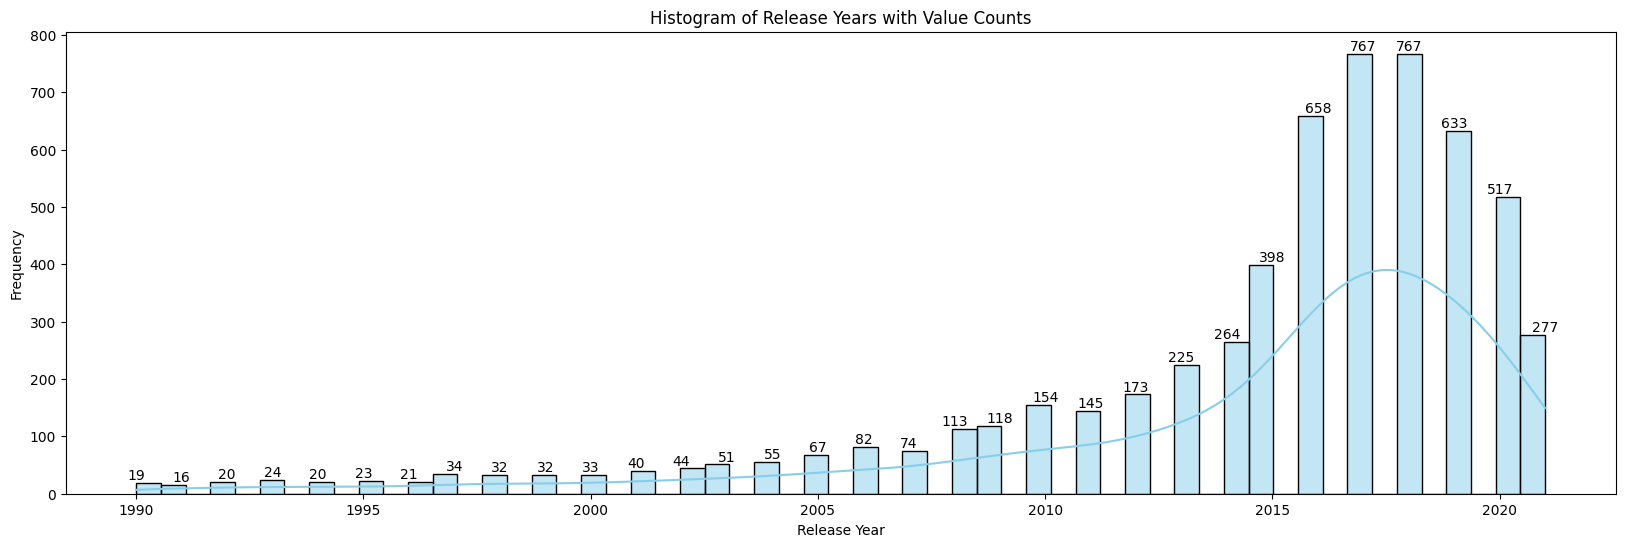

In [ ]:
plt.figure(figsize=(20, 6))
sns.histplot(data=df2, x='release_year', kde=True, color='skyblue')

# Add value counts for each bar
counts = df2['release_year'].value_counts()
for i, count in enumerate(counts):
    plt.text(counts.index[i], count + 1, str(count), ha='center', va='bottom', fontsize=10)

# Plot labels and title
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Histogram of Release Years with Value Counts')

Insights:

We saw ince in number of movies released per year since past 30 years. There was a gradual increase until 2010, from 2010 to 2020 there was a steep increase in number of movies. However seems like there was dip in number of movies in 2020, could be due to the affect od Covid-19.

###6.2 Comparison of tv shows vs. movies.

In [ ]:
df3= df[(df['type']=='TV Show') & (df['release_year']>=1990)]


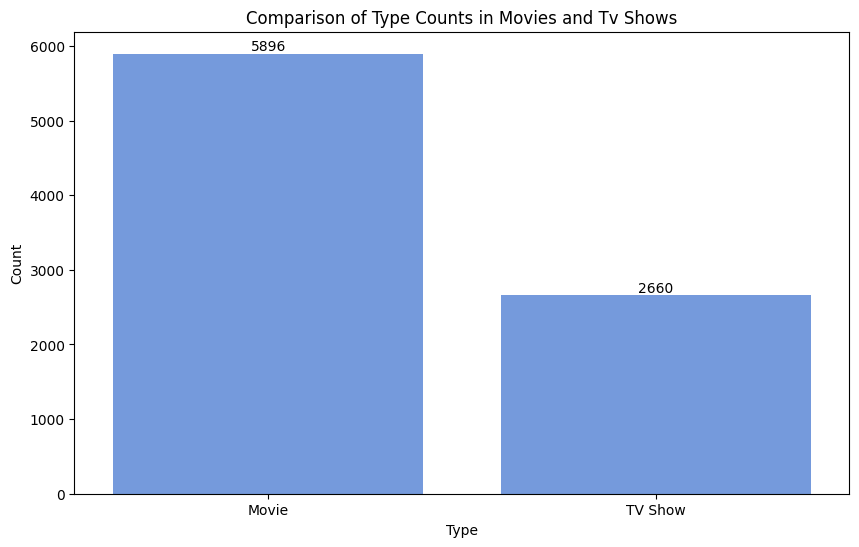

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(x='type', data=df2, order=df2['type'].value_counts().index, color='cornflowerblue')

counts_df2 = df2['type'].value_counts()
for i, count in enumerate(counts_df2):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

sns.countplot(x='type', data=df3, order=df3['type'].value_counts().index, color='cornflowerblue')

counts_df3 = df3['type'].value_counts()
for i, count in enumerate(counts_df3):
    plt.text(i+1, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Comparison of Type Counts in Movies and Tv Shows')

plt.show()

Netflix has produced 70% Movies and 30% TV Shows

### 6.3 What is the best time to launch a TV show?


<ipython-input-125-72889ac7bc76>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['month_added'] = tv_shows['date_added'].dt.month
<ipython-input-125-72889ac7bc76>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['year_added'] = tv_shows['date_added'].dt.year


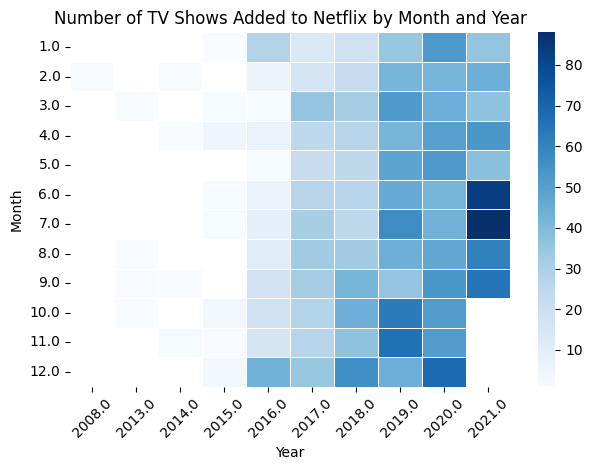

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])

tv_shows = df[df['type'] == 'TV Show']

tv_shows['month_added'] = tv_shows['date_added'].dt.month
tv_shows['year_added'] = tv_shows['date_added'].dt.year

tv_shows_by_month_year = tv_shows.groupby(['month_added', 'year_added']).size().reset_index(name='count')

tv_shows_by_month_year_pivot = tv_shows_by_month_year.pivot(index='month_added', columns='year_added', values='count')

sns.heatmap(tv_shows_by_month_year_pivot, cmap='Blues',  linewidths=.5)
plt.title('Number of TV Shows Added to Netflix by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

So according to the Hetmap more TV Shows were released in June and July 2021

### 6.4 Analysis of actors/directors of different types of shows/movies.

Top 5 directors

In [ ]:
direc= df1[df1['director'] != 'Unkown director']

In [ ]:

direc = direc[direc.director != 'Unknown Director']

dc =direc.groupby(['director']).size().reset_index(name='Total Count')

In [ ]:
dc = dc.sort_values(by=['Total Count'], ascending = False)
dc

,director,Total Count
2945,Martin Scorsese,217
4425,Steven Spielberg,205
2938,Martin Campbell,154
3739,Raja Gosnell,154
3031,McG,150
...,...,...
2536,Klaus Erik Okstad,1
998,Daniel Arasanz,1
2540,Koji Morimoto,1
3627,Phil Joanou,1


In [ ]:
dc = dc.sort_values(by=['Total Count'],ascending=False).head(5)
dc

,director,Total Count
2945,Martin Scorsese,217
4425,Steven Spielberg,205
2938,Martin Campbell,154
3739,Raja Gosnell,154
3031,McG,150


Text(0.5, 1.0, 'Top Directors on Netflix')

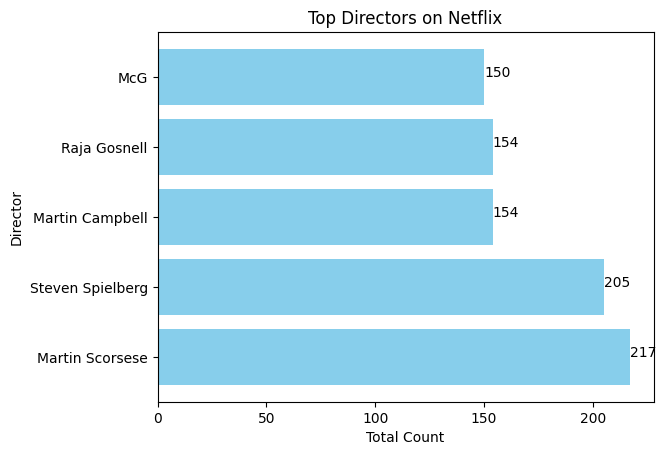

In [ ]:
plt.barh(dc['director'], dc['Total Count'], color='skyblue')

for index, value in enumerate(dc['Total Count']):
    plt.text(value, index, str(value))

# Adding labels and title
plt.xlabel('Total Count')
plt.ylabel('Director')
plt.title('Top Directors on Netflix')

Top 5 Actors


In [ ]:
actor = actor[actor.cast != 'Unknown cast']

ac =actor.groupby(['cast']).size().reset_index(name='Total Count')
ac = ac.sort_values(by=['Total Count'], ascending = False)
ac
ac = ac.sort_values(by=['Total Count'],ascending=False).head(5)
ac

,cast,Total Count
1309,Alfred Molina,85
19681,Liam Neeson,82
15768,John Krasinski,67
10845,Frank Langella,66
29378,Salma Hayek,66


Text(0.5, 1.0, 'Top Actors on Netflix')

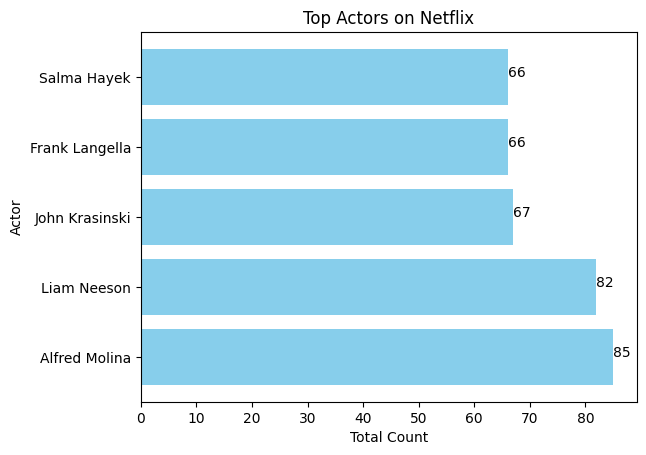

In [ ]:
plt.barh(ac['cast'], ac['Total Count'], color='skyblue')

for index, value in enumerate(ac['Total Count']):
    plt.text(value, index, str(value))

# Adding labels and title
plt.xlabel('Total Count')
plt.ylabel('Actor')
plt.title('Top Actors on Netflix')

### 6.5 Does Netflix has more focus on TV Shows than movies in recent years

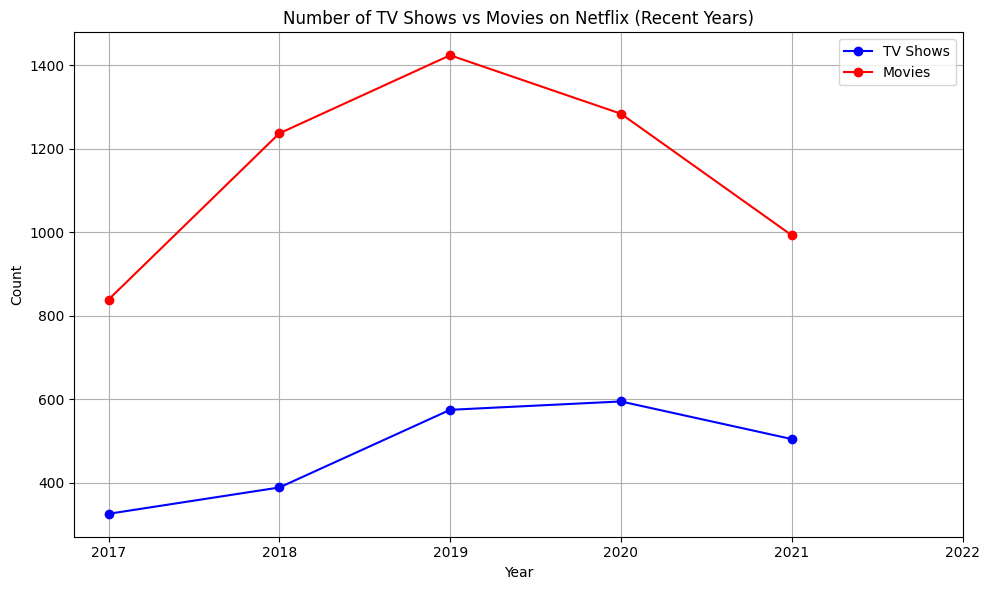

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])

df['year_added'] = df['date_added'].dt.year

recent_years = range(2017, 2023)

tv_shows = df[(df['type'] == 'TV Show') & (df['year_added'].isin(recent_years))]
movies = df[(df['type'] == 'Movie') & (df['year_added'].isin(recent_years))]

tv_shows_count = tv_shows.groupby('year_added').size()
movies_count = movies.groupby('year_added').size()

plt.figure(figsize=(10, 6))

plt.plot(tv_shows_count.index, tv_shows_count.values, marker='o', linestyle='-', color='b', label='TV Shows')
plt.plot(movies_count.index, movies_count.values, marker='o', linestyle='-', color='r', label='Movies')

plt.title('Number of TV Shows vs Movies on Netflix (Recent Years)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(recent_years)
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

Insights: Looks like in recent years there have been more number of movies added as compared to the Tv shows.

##6.6 Understanding what content is available in different countries


In [ ]:
df1.shape

(89382, 12)

In [ ]:
df1.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
country_counts = df1['country'].value_counts()
country_counts

country
United States      30471
India               8537
United Kingdom      5713
Unknown country     5421
Canada              3946
                   ...  
Mongolia               1
Armenia                1
Panama                 1
Uganda                 1
Palestine              1
Name: count, Length: 128, dtype: int64

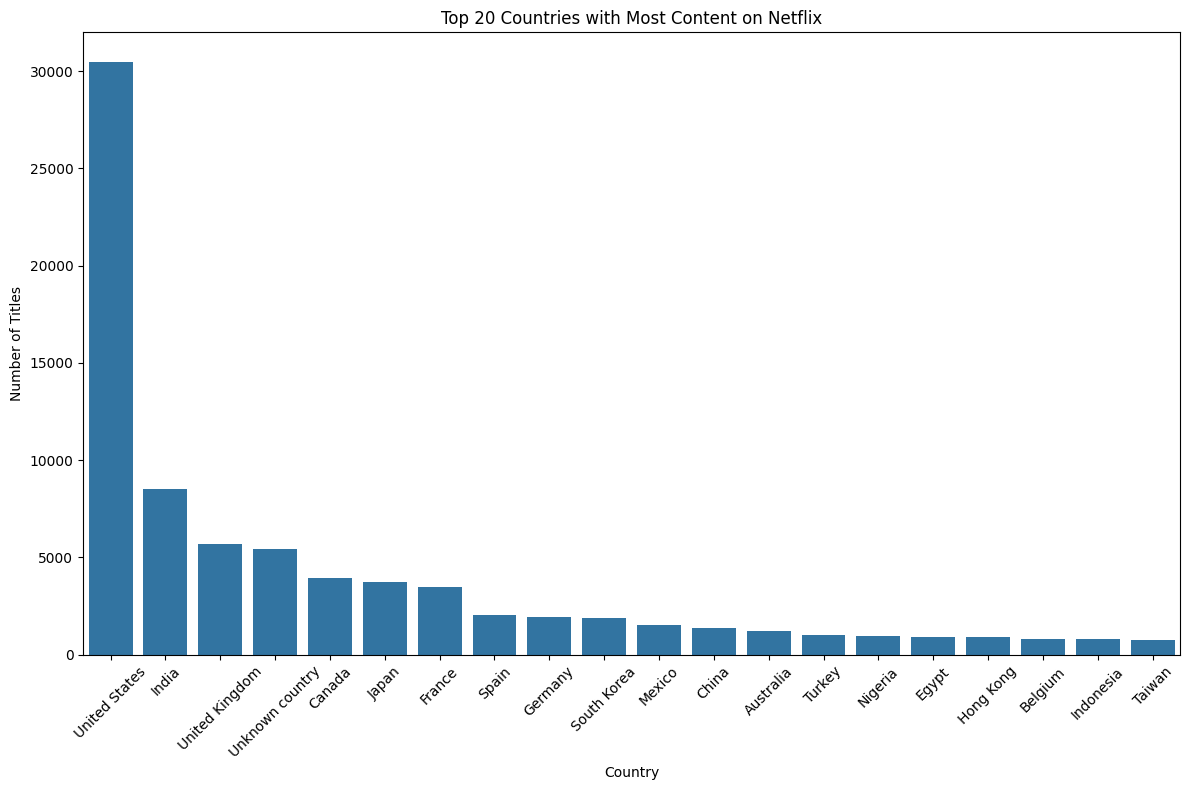

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=country_counts.index[:20], y=country_counts.values[:20])
plt.title('Top 20 Countries with Most Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




## **7.** Business Insights

• Around 70% content on Netflix is Movies and around 30% content is TV shows.

• The movies and TV shows uploading on the Netflix started from the year 2008, It had very
lesser content till 2014.

• Year 2015 marks the drastic surge in the content getting uploaded on Netflix. It continues the uptrend since then and 2019 marks the highest number of movies and TV shows added on the Netflix. Year 2020 and 2021 has seen the drop in content added on Netflix, possibly
because of Pandemic. But still , TV shows content have not dropped as drastic as movies.

• Since 2018, A drop in the movies is seen , but rise in TV shows is observed clearly. Being in continuous uptrend , TV shows surpassed the movies count in mid 2020. It shows the rise in popularity of tv shows in recent years.

• Netflix has movies from variety of directors. Around 4993 directors have their movies or tv shows on Netflix.

• Netflix has movies from total 122 countries, United States being the highset contributor with almost 37% of all the content.

• The release year for shows is concentrated in the range 2005-2021.

• various ratings of content is avaialble on netfilx, for the various viewers categories like Teens, Adults , little kids, older Kids. Highest number of movies and TV shows are rated TV-MA
(for mature audiences).

• Content in most of the ratings is available in lesser quanitity except in US. Ratings like TV-Y7, TV-Y7 FV , PG ,TV-G , G , TV-Y , TV-PG are very less avaialble in all countries except
US.

• International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.

• Mostly country specific popular genres are observed in each country. Only United States have a good mix of almost all genres. Eg. Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan) and so on.

• Indian Actors have been acted in maximum movies on netflix. Top 5 actors are in India based
on quantity of movies.

• Shorter duration movies have been popular in last 10 years.

• Indian and German Movies are very older Movies, avrage 8 years older movies.

• Spain Movies are very recent movies, avarage 1 year older Movies.

• Japan TV Shows are very older, avarage 5 years older .

• India and Spain TV Shows are very recent TV Shows, avarage 1 year older TV Shows.



## **8.** Recommendations

• Very limited genres are focussed in most of the countries except US. It seems the current available genres suits best for US and few countries but maximum countries need some more genres which are highly popular in the region. eg. Indian Mythological content is highly
popular. We can create such more country specific genres and It might also be liked acorss the world just like Japanese Anime.

• Country specific insights - The content need to be targetting the demographic of any country. Netflix can produce higher number of content in the perticular rating as per demographic of the country.
Eg.
– The country like India , which is highly populous , has maximum content available only
in three rating TV-MA, TV-14 , TV-PG. It is unlikely to serve below 14 age and above
35 year age group .


In [ ]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,38
